<a href="https://www.kaggle.com/code/phoebec216/friends-s10-e17-18-character-positivity?scriptVersionId=93018058" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Friends S10 E17/18 Character Positivity**

As I've said before: I, like a lot of people, love Friends! And I, like most people, have my favourite character (can you guess who?).

After my last Notebook on Friends character positivity, which included some surprising results, I decided that I did want to see which character is the most positive in the final episode.

*Note: The majority of the markdowns and code is copied directly from my previous notebook, up until the point of interpretation of the data.*

**Data Input**

The data is currently a text file and I plan to turn it into a data frame consisting of a column of character names and a column of speech by that character. First, however, I am going to create a nested list and clean it before turning it into a data frame.

In [2]:
df = open('../input/friends-tv-series-screenplay-script/S10E17-S10E18 The Last One Part I  II.txt', "r")
lines = df.readlines()
df.close()

# remove /n at the end of each line
for index, line in enumerate(lines):
      lines[index] = line.strip()
# print(lines)

#for line in lines:
    #print(line)
names = ['Phoebe', 'Monica', 'Rachel', 'Chandler', 'Joey', 'Ross']

data = []

for line in lines:
    # print(line)
    if ":" in line:
        splitline = line.split(': ')
        #print(splitline[0])
        if splitline[0] in names:
            data.append(splitline)
    

# m = lines[6].split(':')
# print(m[0] in names)
# for value in data:
#     print(value)
print(data[0:2])

[['Monica', 'Erica, are you okay?'], ['Monica', 'Oh my God!']]


**Data Cleaning**

There are a few things I need to check for, firstly that each list in data contains only 2 values, character name and speech, and that within the speech data there is only speech.

In [3]:
for value in range(len(data)):
    if len(data[value]) > 2:
        print(value)
        print(data[value], '\n')

Well it looks like there were no errors in script formatting this time. Less cleaning for me to do.

I will however still remove any stage directions that exist within parentheses (assuming this is still ocurring).

In [4]:
def remove_stage_directions(line):
    start = line.index("(")
    end = line.index(")")
    new_line = line[0:start] + line[end+1:]
    return new_line

In [5]:
for value in data:
    line = value[1]
    bracket_count = line.count("(")
    if bracket_count == 0:
        continue
    else:
        # print(line)
        line_list = [line]
        while bracket_count > 0:
            new_line = remove_stage_directions(line_list[-1])
            line_list.append(new_line)
            bracket_count -= 1
    # print(line_list[-1])
    value[1] = line_list[-1]

I will now assume that the data is all cleaned.

Now I'll put the data into a data frame and check how it looks.

In [6]:
df = pd.DataFrame(data, columns = ["Name", "Line"])
df.head()

,Name,Line
0,Monica,"Erica, are you okay?"
1,Monica,Oh my God!
2,Chandler,Relax! We'll just get her some antacids.
3,Monica,She doesn't have a stomach-ache. She's in labor!
4,Chandler,Oh my God!


**Data Analysis**

My plan is to use NLTK senntiment analysis to determine whether each line of speech is positive or negative, then average these values to determine the proportion of lines where each character is positive.

In [7]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [8]:
lines = df["Line"]

sentiment_classification_labels = []
for index, line in enumerate(lines):
  # blob is the entire current review in the loop
  blob = TextBlob(line)

  # aggregating the sentiment score
  sentiment = 0
  # looping over each sentence in the review
  for sentence in blob.sentences:
    sentiment += sentence.sentiment.polarity
  
  # determining if scores are negative or positive
  if sentiment > 0:
    sentiment_label_for_current_review = 1
  else:
    sentiment_label_for_current_review = 0

  # adding sentiment label to list
  sentiment_classification_labels.append(sentiment_label_for_current_review)

# adding all sentiment labels to the data frame
df['Sentiment_Classification_Labels'] = sentiment_classification_labels
df.head()

,Name,Line,Sentiment_Classification_Labels
0,Monica,"Erica, are you okay?",1
1,Monica,Oh my God!,0
2,Chandler,Relax! We'll just get her some antacids.,0
3,Monica,She doesn't have a stomach-ache. She's in labor!,0
4,Chandler,Oh my God!,0


In [9]:
char_sentiment = []
for name in names:
    score = 0
    number = 0
    for index, row in df.iterrows():
        if row["Name"] != name:
            pass
        elif row["Name"] == name:
            score += row["Sentiment_Classification_Labels"]
            number += 1
    av = score*100/number
    char_sentiment.append([name, av])

In [10]:
for value in char_sentiment:
    print(f"{value[0]} is positive in {round(value[1], 2)}% of their lines.\n")

Phoebe is positive in 25.88% of their lines.

Monica is positive in 31.94% of their lines.

Rachel is positive in 27.4% of their lines.

Chandler is positive in 42.17% of their lines.

Joey is positive in 32.14% of their lines.

Ross is positive in 29.46% of their lines.



**Data Visualisation**

Now I'm going to show this information in a clearer way.

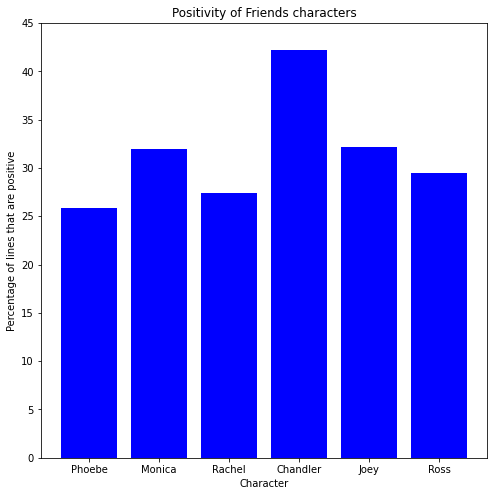

In [11]:
from matplotlib import pyplot as plt

positivity = []
for value in char_sentiment:
    positivity.append(value[1])

plt.figure(figsize=(8, 8))
plt.bar(names, positivity, color = 'b')
plt.ylabel("Percentage of lines that are positive")
plt.xlabel("Character")
plt.title("Positivity of Friends characters")
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
plt.show()

Interesting results again! Chandler is still the most positive character, even more positive than when he started. His positivity is also 10 percentage points higher than the next highest, Joey, who at the start of the series was the character with the fewest positive lines.
The award for being least positive character now goes to Phoebe, somewhat surprising as she is known for being the quirky one of the group.

**Conclusion**

In the final ever episodes of Friends Chandler is the still the most positive character, Joey is now the second most positive character, while Phoebe is the least positive character.

I would love to carry out a few more future analyses using this dataset and any others that hold data on Friends, if you have any suggestions please let me know as a comment here on Kaggle.

Thanks for reading, hope you enjoyed it!